In [1]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

df.shape

(6125, 10)

In [2]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2021-11-13 02:47:46,00:08:42,NaN,The Loud House Movie,NaN,Chrome PC (Cadmium),01:19:05,01:19:05,US (United States)
1,Kids,2021-11-12 02:58:30,00:19:21,NaN,The Loud House Movie,NaN,Chrome PC (Cadmium),01:10:23,Not latest view,US (United States)
2,Kids,2021-11-11 01:55:38,00:03:06,NaN,The Loud House Movie,NaN,Chrome PC (Cadmium),00:49:53,Not latest view,US (United States)
3,Kids,2021-11-10 04:37:56,00:00:04,NaN,The Loud House Movie,NaN,Chrome PC (Cadmium),00:46:47,Not latest view,US (United States)
4,Kids,2021-11-10 03:11:03,00:24:50,NaN,The Loud House Movie,NaN,Chrome PC (Cadmium),00:46:43,Not latest view,US (United States)


In [3]:
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [4]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                                object
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [5]:
#Change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

#Convert from UTC timezone to Eastern Time
df.index = df.index.tz_convert('US/Eastern')

#Reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,2021-11-12 21:47:46-05:00,Kids,00:08:42,NaN,The Loud House Movie,NaN,Chrome PC (Cadmium),01:19:05,01:19:05,US (United States)


In [6]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time                 datetime64[ns, US/Eastern]
Profile Name                                   object
Duration                              timedelta64[ns]
Attributes                                     object
Title                                          object
Supplemental Video Type                        object
Device Type                                    object
Bookmark                                       object
Latest Bookmark                                object
Country                                        object
dtype: object

In [7]:
#create a new dataframe called aa that takes from df
#only the rows in which the Title column contains 'All American'
aa = df[df['Title'].str.contains('All American', regex = False)]
aa.sample(20)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
1339,2021-07-14 03:06:57-04:00,WAFFY,0 days 00:00:07,NaN,All American: Season 1: Back in The Day (Episo...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:01:10,Not latest view,US (United States)
586,2022-03-19 00:17:58-04:00,WAFFY,0 days 00:00:02,NaN,All American: Season 3: Put Up or Shut Up (Epi...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:00:08,Not latest view,US (United States)
1243,2021-08-01 02:08:44-04:00,WAFFY,0 days 00:00:01,NaN,All American: Season 3: All American: Homecomi...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:00:07,Not latest view,US (United States)
1323,2021-07-17 00:20:54-04:00,WAFFY,0 days 00:21:44,NaN,All American: Season 2: Hustle & Motivate (Epi...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:41:57,00:41:57,US (United States)
599,2022-03-15 01:46:13-04:00,WAFFY,0 days 00:00:01,NaN,All American: Season 3: My Mind's Playing Tric...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:00:07,Not latest view,US (United States)
1862,2021-04-02 23:00:39-04:00,WAFFY,0 days 00:10:51,NaN,All American: Season 2: Bring the Pain (Episod...,NaN,DefaultWidevineAndroidPhone,00:32:24,Not latest view,US (United States)
3337,2020-08-22 01:01:49-04:00,WAFFY,0 days 00:41:58,NaN,All American: Season 2: One of Them Nights (Ep...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:41:57,Not latest view,US (United States)
389,2022-06-10 00:07:18-04:00,WAFFY,0 days 00:42:06,NaN,All American: Season 4: Babies and Fools (Epis...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:41:58,00:41:58,US (United States)
582,2022-03-19 01:07:44-04:00,WAFFY,0 days 00:41:39,NaN,All American: Season 3: The Bigger Picture (Ep...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:42:01,00:42:01,US (United States)
1346,2021-07-13 00:40:42-04:00,WAFFY,0 days 00:24:22,NaN,All American: Season 1: Homecoming (Episode 8),NaN,Android DefaultWidevineL3Tablet Android Tablet,00:41:55,00:41:55,US (United States)


In [8]:
aa.shape

(276, 10)

In [9]:
#filtering out short durations using timedelta
aa = aa[(aa['Duration'] > '0 days 00:01:00')]
aa.shape

(192, 10)

In [10]:
#How much time have I spent watching All American?
aa['Duration'].sum()

Timedelta('3 days 22:14:30')

In [11]:
#When do I watch All American?
aa['weekday'] = aa['Start Time'].dt.weekday
aa['hour'] = aa['Start Time'].dt.hour

#check to make sure the columns were added correctly
aa.head(4)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,weekday,hour
364,2022-06-12 02:06:47-04:00,WAFFY,0 days 00:41:55,NaN,All American: Season 4: Champagne Glasses (Epi...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:42:00,00:42:00,US (United States),6,2
365,2022-06-12 01:31:15-04:00,WAFFY,0 days 00:35:31,NaN,All American: Season 4: Murder Was the Case (E...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:41:58,00:41:58,US (United States),6,1
366,2022-06-12 01:17:21-04:00,WAFFY,0 days 00:06:23,NaN,All American: Season 4: Murder Was the Case (E...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:06:29,Not latest view,US (United States),6,1
367,2022-06-12 01:11:26-04:00,WAFFY,0 days 00:05:54,NaN,All American: Season 4: Came Back for You (Epi...,NaN,Android DefaultWidevineL3Tablet Android Tablet,00:41:56,00:41:56,US (United States),6,1


<AxesSubplot:title={'center':'All American Episodes Watched by Day'}>

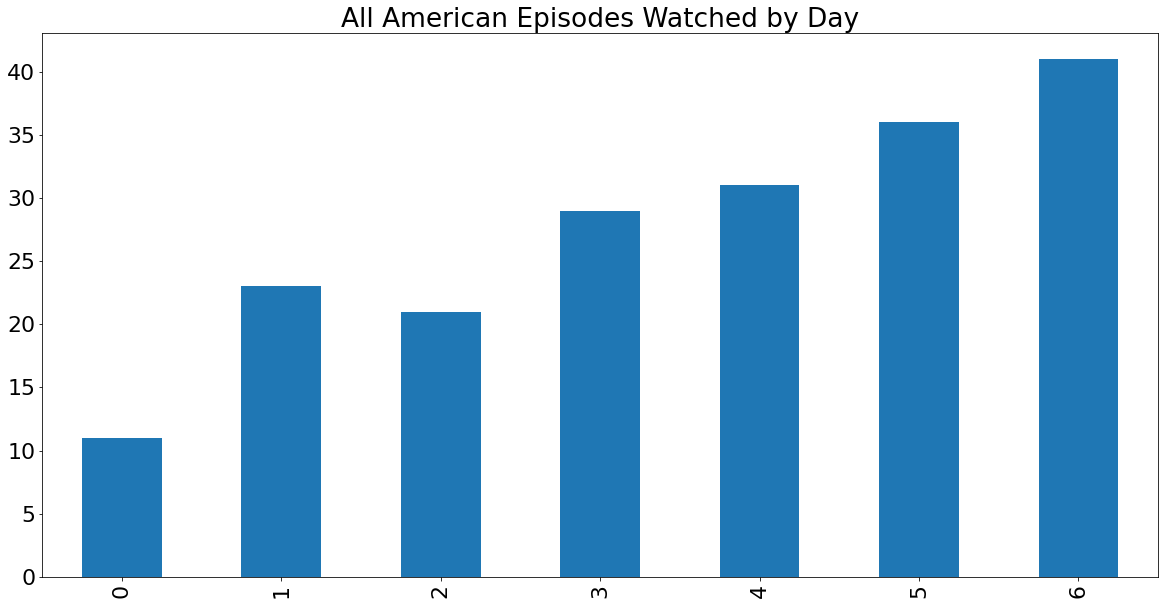

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib

df = pd.read_csv('ViewingActivity.csv')

df.shape

df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)

#Change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

#Convert from UTC timezone to Eastern Time
df.index = df.index.tz_convert('US/Eastern')

#Reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

df['Duration'] = pd.to_timedelta(df['Duration'])

#create a new dataframe called aa that takes from df
#only the rows in which the Title column contains 'All American'
aa = df[df['Title'].str.contains('All American', regex = False)]
aa.sample(20)

#filtering out short durations using timedelta
aa = aa[(aa['Duration'] > '0 days 00:01:00')]
aa.shape

#How much time have I spent watching All American?
aa['Duration'].sum()

#When do I watch All American?
aa['weekday'] = aa['Start Time'].dt.weekday
aa['hour'] = aa['Start Time'].dt.hour

#check to make sure the columns were added correctly
aa.head(4)

#set the categorical and define the order so the days are plotted Monday-Sunday
aa['Weekday'] = pd.Categorical(aa['weekday'], categories = [0, 1, 2, 3, 4, 5, 6], ordered = True)

#create aa_by_day and count the rows for each weekday, assigning the result to that variable
aa_by_day = aa['weekday'].value_counts()

#sort the index using our categorical, so that Monday (0) is 1st, Tuesday (1) is 2nd, etc.
aa_by_day = aa_by_day.sort_index()

#optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

#plot aa_by_day as a bar chart with the listed size and title
aa_by_day.plot(kind = 'bar', figsize = (20,10), title = 'All American Episodes Watched by Day')

<AxesSubplot:title={'center':'All American Episodes Watched By Hour'}>

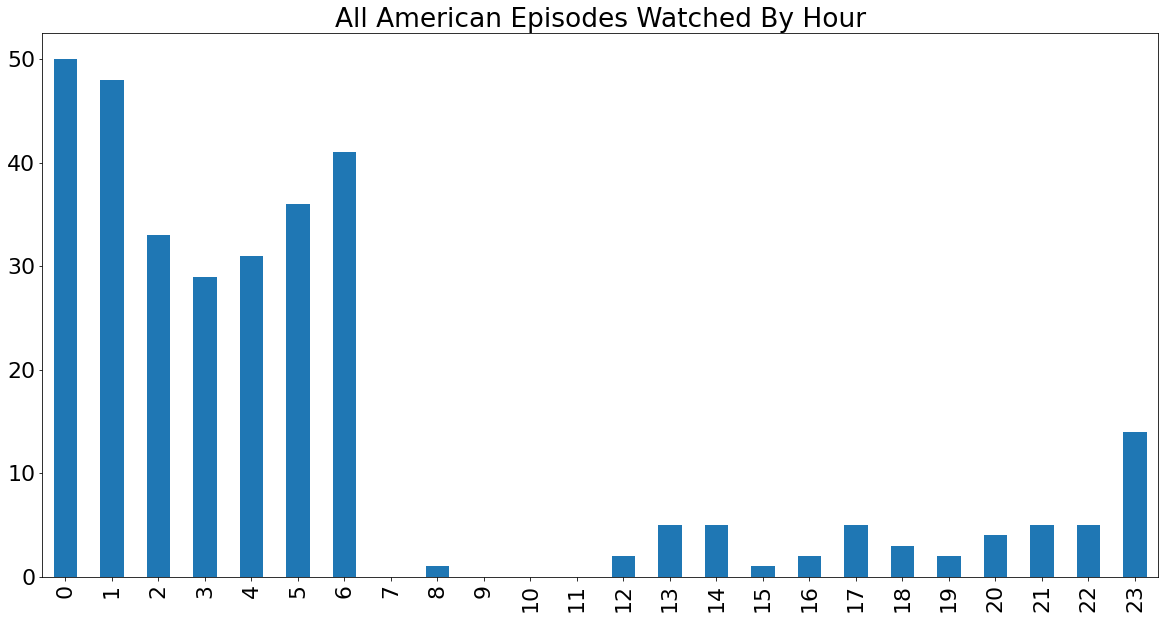

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib

df = pd.read_csv('ViewingActivity.csv')

df.shape

df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)

#Change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

#Convert from UTC timezone to Eastern Time
df.index = df.index.tz_convert('US/Eastern')

#Reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

df['Duration'] = pd.to_timedelta(df['Duration'])

#create a new dataframe called aa that takes from df
#only the rows in which the Title column contains 'All American'
aa = df[df['Title'].str.contains('All American', regex = False)]
aa.sample(20)

#filtering out short durations using timedelta
aa = aa[(aa['Duration'] > '0 days 00:01:00')]
aa.shape

#How much time have I spent watching All American?
aa['Duration'].sum()

#When do I watch All American?
aa['weekday'] = aa['Start Time'].dt.weekday
aa['hour'] = aa['Start Time'].dt.hour

#check to make sure the columns were added correctly
aa.head(4)

#set the categorical and define the order so the days are plotted Monday-Sunday
aa['Weekday'] = pd.Categorical(aa['weekday'], categories = [0, 1, 2, 3, 4, 5, 6], ordered = True)

#create aa_by_day and count the rows for each weekday, assigning the result to that variable
aa_by_day = aa['weekday'].value_counts()

#sort the index using our categorical, so that Monday (0) is 1st, Tuesday (1) is 2nd, etc.
aa_by_day = aa_by_day.sort_index()

#optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

#plot aa_by_day as a bar chart with the listed size and title
aa_by_day.plot(kind = 'bar', figsize = (20,10), title = 'All American Episodes Watched by Day')

#set our categorical and define the order so the hours are plotted 0-23
aa['hour'] = pd.Categorical(aa['hour'], categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                           ordered = True)

#create aa_by_hour and count the rows for each hour, assigning the result to that variable
aa_by_hour = aa['hour'].value_counts()

#sort the index using our categorical, so that midnight is first (0), 1 a.m. (1) is second, etc.
aa_by_hour = aa_by_hour.sort_index()

#plot aa_by_hour as a bar chart with the listed size and title
aa_by_hour.plot(kind = 'bar', figsize = (20,10), title = 'All American Episodes Watched By Hour')